# Visualize Time Series

In [1]:
import helpers
load = helpers.DataBaseLoader(user='mt361', password='tian01054017', schema='mimiciv_derived')

In [2]:
urineoutput_df = load['urine_output']
urineoutput_df.head()

,stay_id,charttime,urineoutput
0,30000153,2174-09-29 12:12:00,280.0
1,30000153,2174-09-29 14:00:00,45.0
2,30000153,2174-09-29 15:00:00,50.0
3,30000153,2174-09-29 16:00:00,50.0
4,30000153,2174-09-29 17:00:00,45.0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize(df, title: str, value: str, num_patients: int=10):
    assert num_patients % 3 == 0
    grouped = df.groupby('stay_id')
    fig, axes = plt.subplots(nrows=num_patients // 3, ncols=3, figsize=(20, 5 * (num_patients // 3)))
    for i, (stay_id, group_data) in enumerate(grouped):
        if i == num_patients:
            break
        sns.lineplot(x=group_data['charttime'], y=group_data[value], marker='s', linewidth=1, ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(f"{title} for stay_id {stay_id}")
    plt.show()

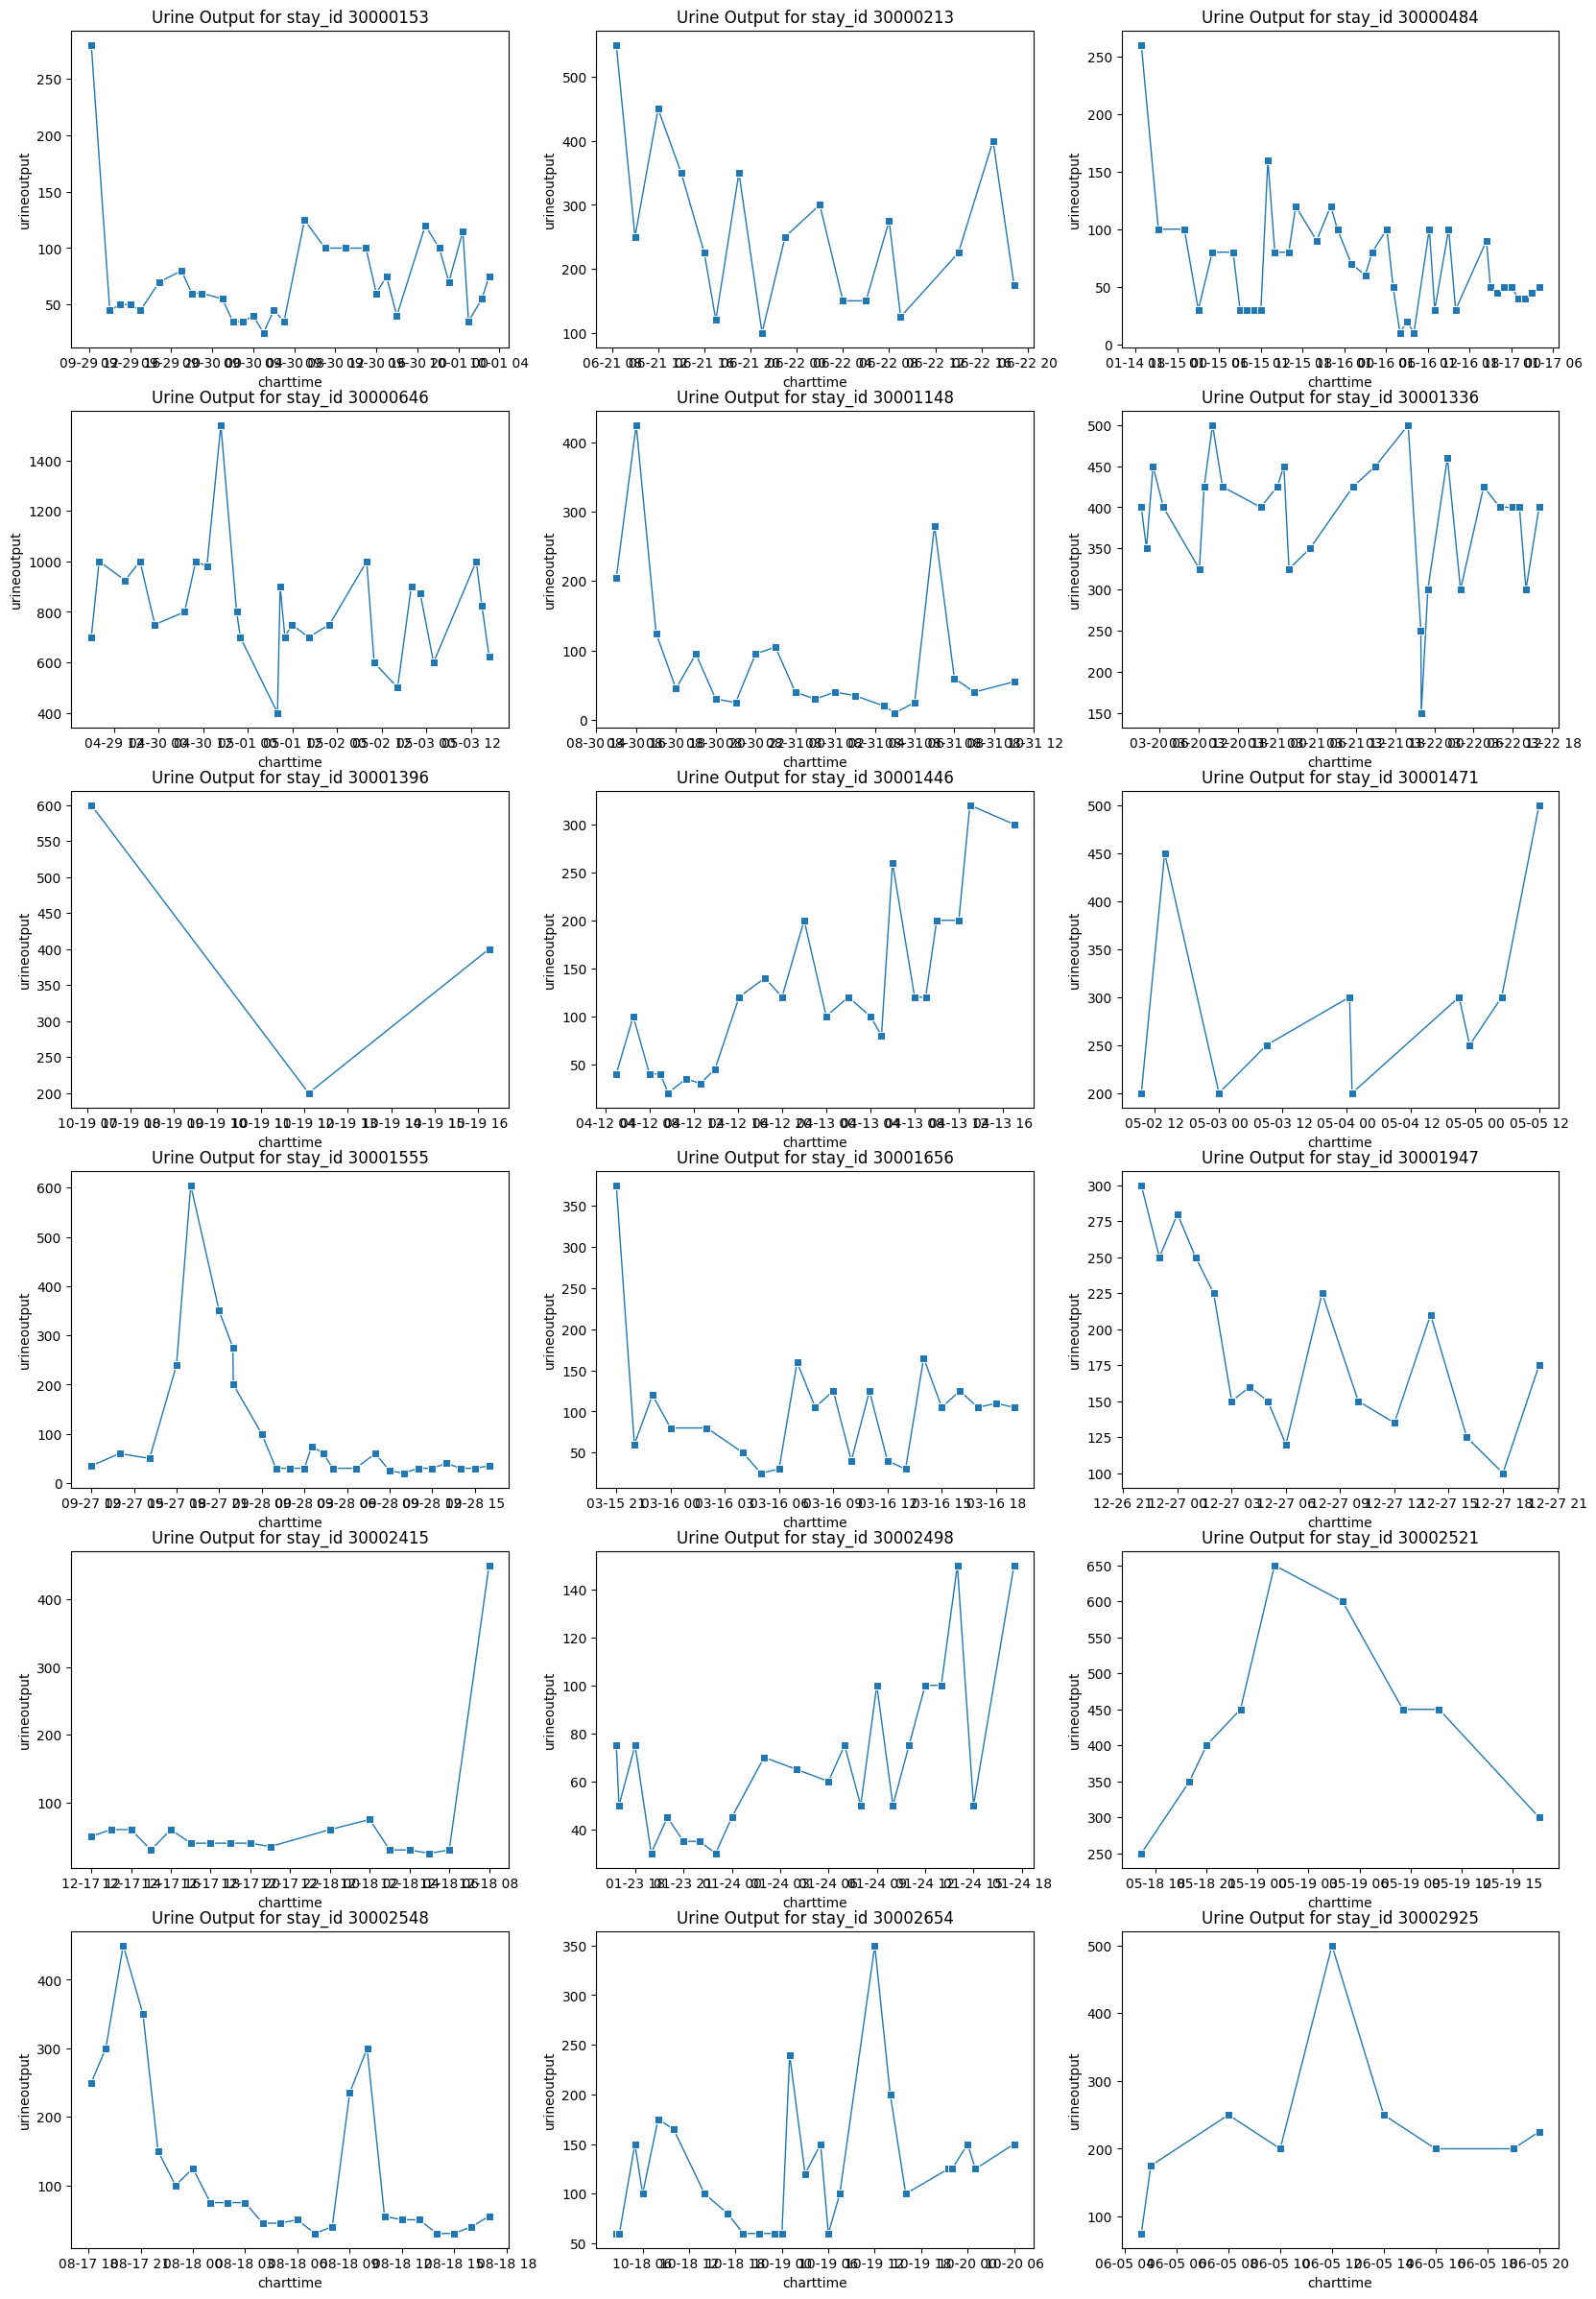

In [4]:
visualize(urineoutput_df, 'Urine Output', 'urineoutput', num_patients=18)

In [5]:
vitals_df = load['vitalsign']
vitals_df.head()

,subject_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10000032,39553978,2180-07-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.06,Oral,NaN,NaN
1,10000032,39553978,2180-07-23 14:11:00,NaN,84.0,48.0,56.0,84.0,48.0,56.0,NaN,NaN,None,NaN,NaN
2,10000032,39553978,2180-07-23 14:12:00,91.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,None,NaN,NaN
3,10000032,39553978,2180-07-23 14:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,98.0,NaN
4,10000032,39553978,2180-07-23 14:30:00,93.0,95.0,59.0,67.0,95.0,59.0,67.0,21.0,NaN,None,97.0,NaN


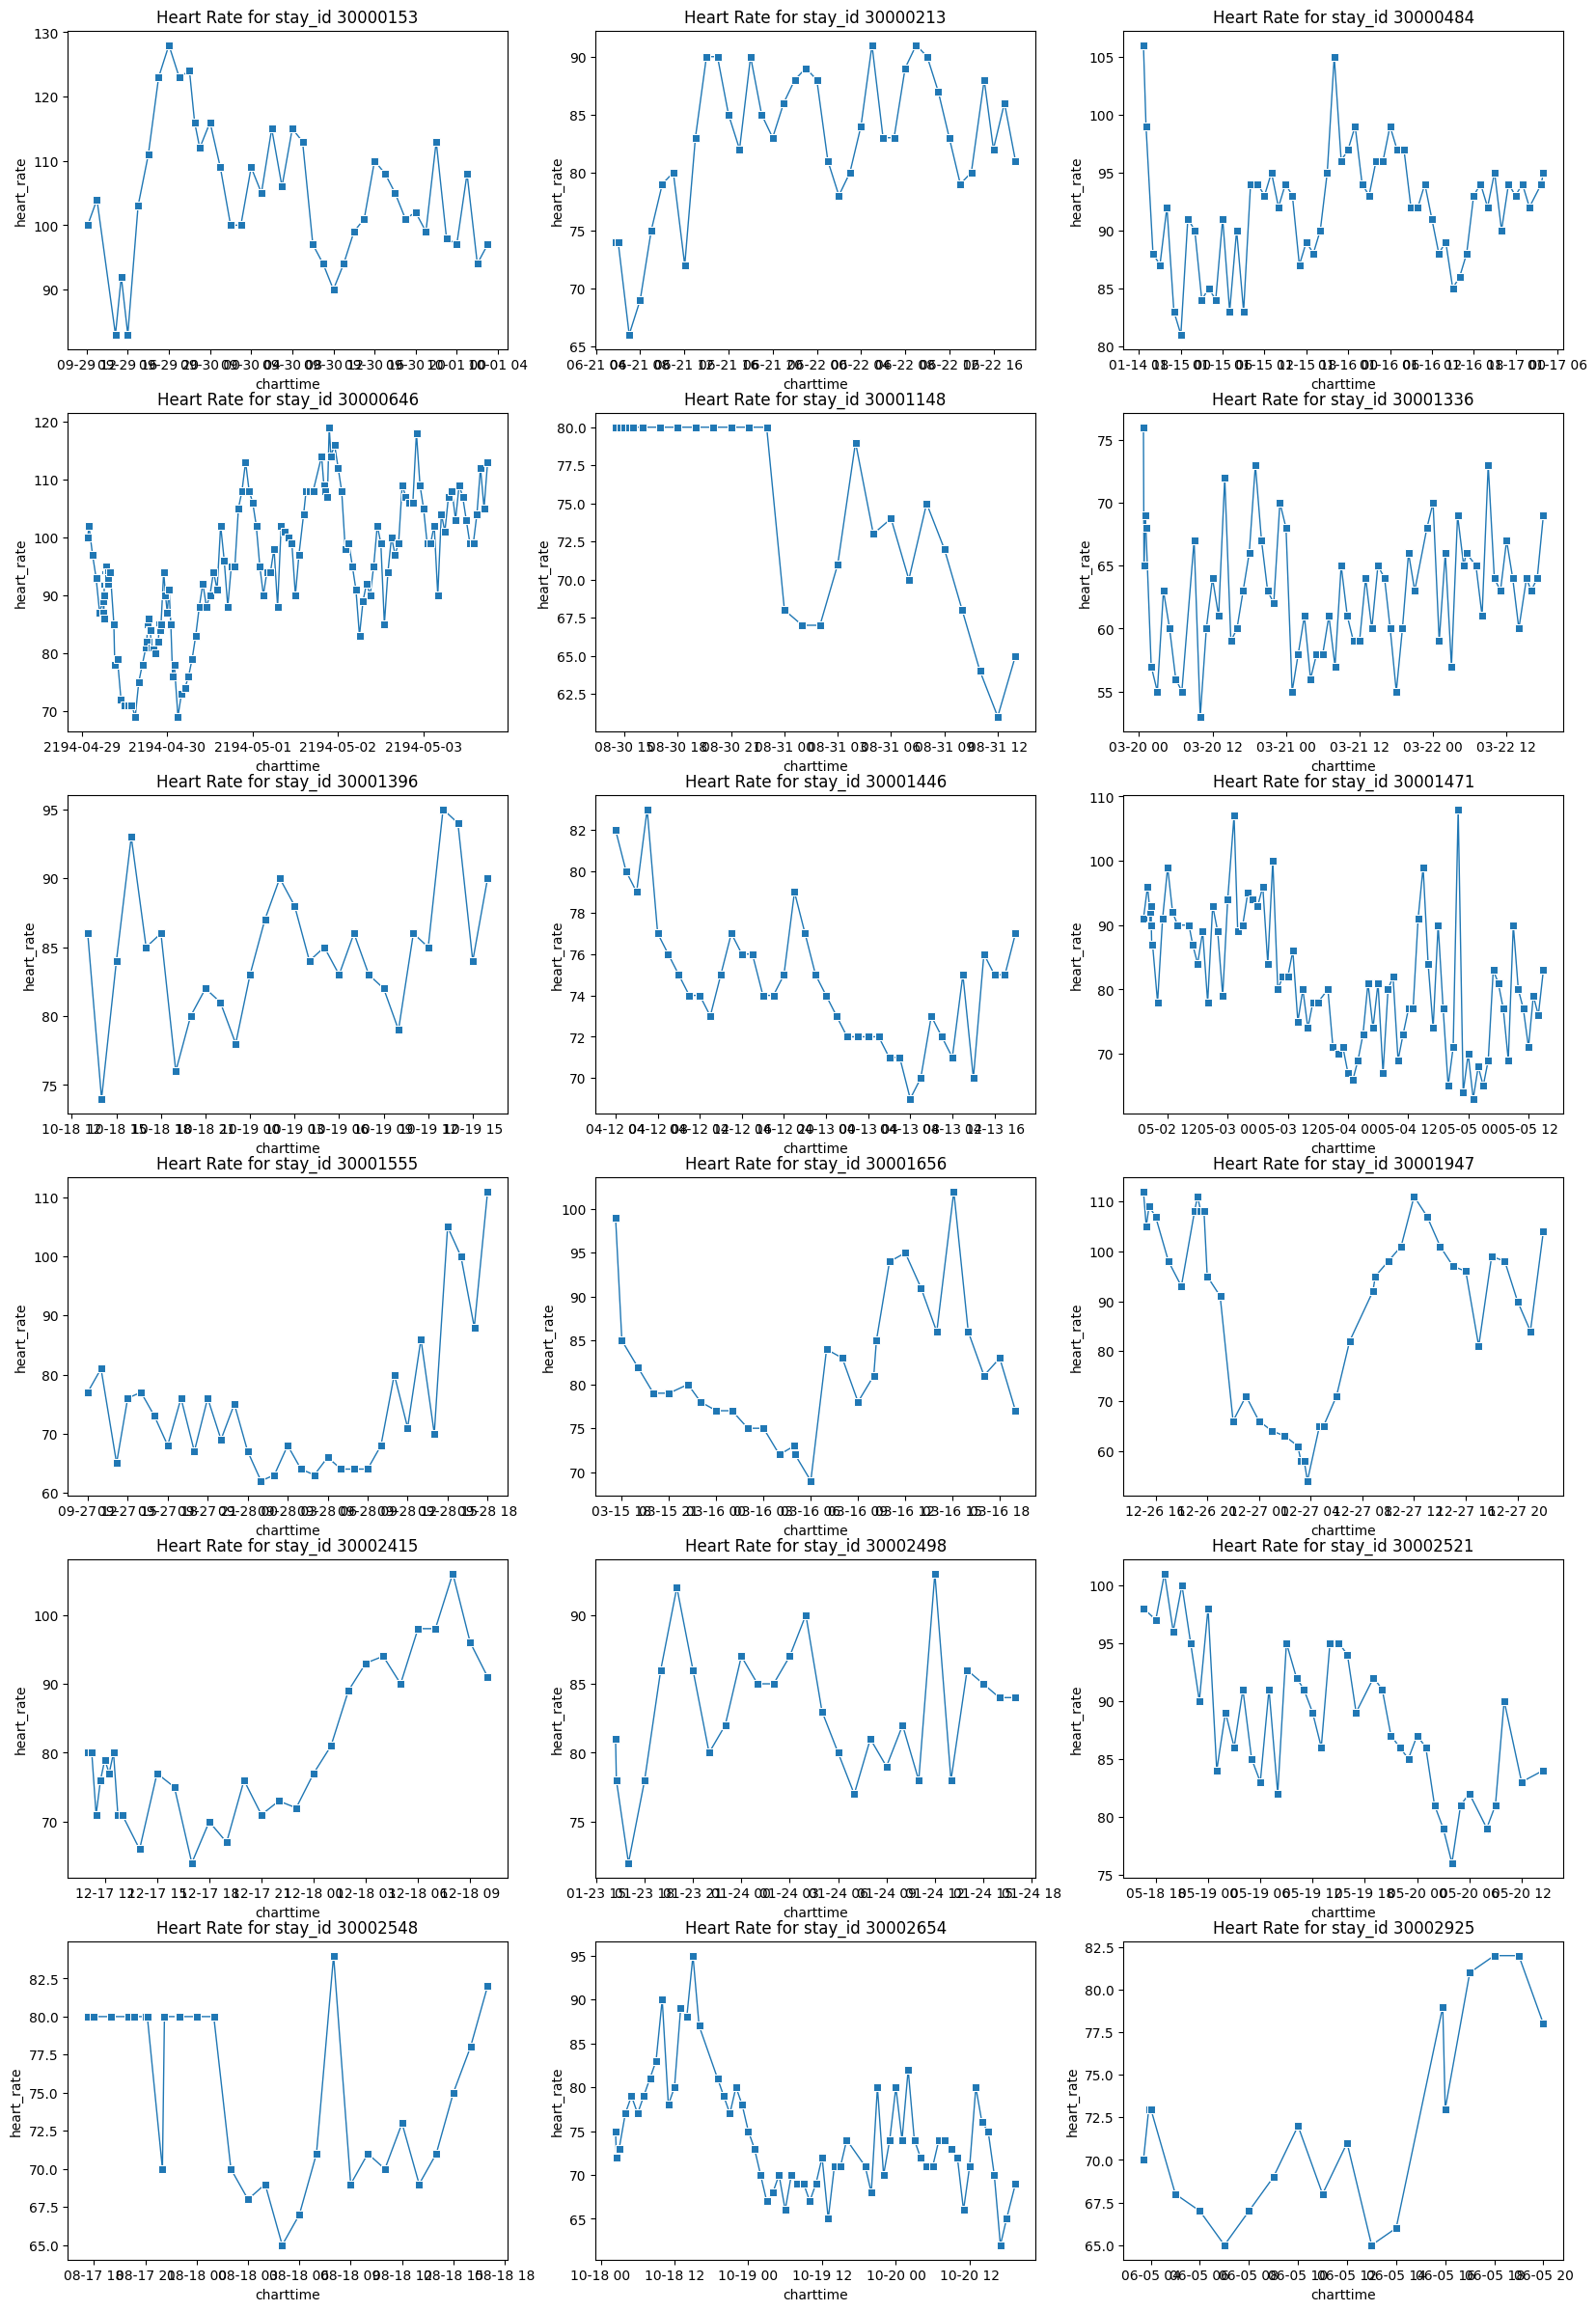

In [6]:
visualize(vitals_df, 'Heart Rate', 'heart_rate', num_patients=18)

In [7]:
import pandas as pd

def get_time_diff(vitalsigns, value: str):
    vitalsigns = vitalsigns[vitalsigns[value].notnull()]
    assert not vitalsigns[value].isnull().any()
    vitalsigns['charttime'] = pd.to_numeric(vitalsigns['charttime'])
    vitalsigns['time_diff'] = vitalsigns['charttime'].diff() / (3.6 * 1e12)
    vitalsigns = vitalsigns[vitalsigns['time_diff'] >= 0]
    return vitalsigns

In [8]:
heartrate_df = get_time_diff(vitals_df, 'heart_rate')
heartrate_df['time_diff'].describe()

/var/folders/t0/wpl_qfjd5s3cczhlskc092xm0000gp/T/ipykernel_86782/3101594736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitalsigns['charttime'] = pd.to_numeric(vitalsigns['charttime'])
/var/folders/t0/wpl_qfjd5s3cczhlskc092xm0000gp/T/ipykernel_86782/3101594736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitalsigns['time_diff'] = vitalsigns['charttime'].diff() / (3.6 * 1e12)


count    6.421682e+06
mean     9.701352e+02
std      1.851875e+04
min      1.666667e-02
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.526008e+05
Name: time_diff, dtype: float64

In [11]:
100 * len(heartrate_df[ (heartrate_df['time_diff'] > 1.5) | (heartrate_df['time_diff'] < 0.7) ]) / len(heartrate_df)

16.73405814862835